<span style='font-size:x-large'><u>**With Rotation**</u></span>


In [9]:
#Code checked: 09/30/2024, Dumi
#Preprocess

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# Load dataset
# Choose file path for the data to load

#file_path = 'new_vega_rotation_overshooting_alpha_mlt_test_no_num_BIGGER_num_gt_180.csv'
#file_path = 'spica_lum_teff_box_age_ge_1e6.csv'
file_path = 'spica_lum_teff_box_2sigma_age_ge_1e6.csv'

d# Read the CSV file into a DataFrame
data = pd.read_csv(file_path, delimiter=",", header=0)

# Display column names in the dataset
print(data.columns)


Index(['mass', 'z', 'fov', 'mlt', 'age', 'log_k', 'teff', 'lum'], dtype='object')

Testing time: 0.17 seconds


Text(0.5, 1.0, 'Random Forest: Actual values vs Predicted values')

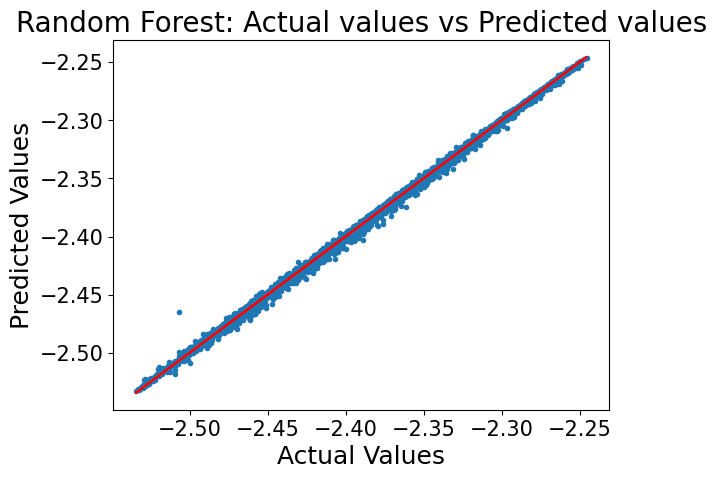

In [10]:
import time

# Define features and target variable
x = data[['mass', 'z', 'fov', 'mlt', 'age', 'teff', 'lum']]
y = data['log_k']

# Split the dataset into training and testing sets (30% for testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Build the Random Forest model
model = RandomForestRegressor(random_state=123)
model.fit(x_train, y_train)

# Predict using the trained model
start_time = time.time()  # Record the start time
predictions = model.predict(x_test)  # Make predictions on the test set
end_time = time.time()  # Record the end time

# Calculate the testing time
test_time = end_time - start_time
print(f"Testing time: {test_time:.2f} seconds")

# Plot Actual vs Predicted values for Random Forest
fig, ax = plt.subplots()
ax.set_xlabel(r"Actual Values", fontsize=18)
ax.set_ylabel(r"Predicted Values", fontsize=18)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Scatter plot of the actual vs predicted values
ax.plot(y_test, predictions, '.')
ax.plot(y_test, y_test, color='r')  # Line representing perfect predictions (y = x)
ax.set_title('Random Forest: Actual values vs Predicted values', fontsize=20)

# Show the plot
plt.show()


In [11]:
# Import evaluation metrics
from sklearn import metrics

# Calculate Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_test, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R² Score (model accuracy)
r2 = metrics.r2_score(y_test, predictions)

# Calculate Mean Absolute Error (MAE) - lower values indicate better performance
mae = metrics.mean_absolute_error(y_test, predictions)

# Print performance metrics
print(f'MSE: {mse:.6f}')
print(f'RMSE: {rmse:.4f}')
print(f'Model Accuracy (R²): {r2 * 100:.2f}%')
print(f'Mean Absolute Error: {mae:.4f}')

MSE: 0.0000
RMSE: 0.0019
Model accuracy is 99.89%
Mean Absolute Error is 0.0012


Text(0, 0.5, 'Frequency')

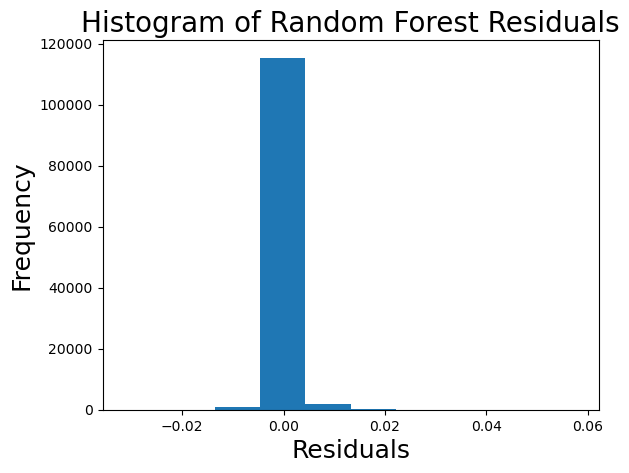

In [5]:
# Plot histogram of residuals (differences between actual and predicted values)
residuals = (y_test - predictions)

# Customize plot appearance
plt.title('Histogram of Random Forest Residuals', fontsize=20)
plt.xlabel('Residuals', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='both', labelsize=15)

# Optional limit settings (uncomment if needed)
# plt.ylim(0, 500)
# plt.xlim(-0.08, 0.08)


## Feature Importance

lum: 1.170328669000207
teff: 0.6417243889143485
fov: 0.11176413877370706
age: 0.016560795599199495
z: 0.013051813578444583
mass: 0.0005244849260839457
mlt: 0.00042929574145423867


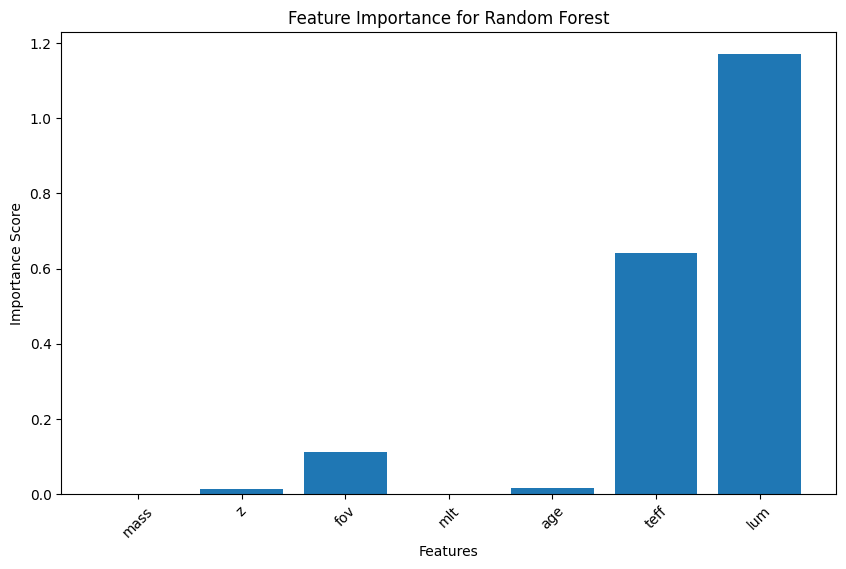

In [12]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Calculate permutation feature importances
perm_importance = permutation_importance(model, x_test, y_test, n_repeats=10, random_state=42)

# Extract the importances and sort them in descending order
importances = perm_importance.importances_mean
sorted_idx = perm_importance.importances_mean.argsort()  # Sort the importances to identify the most important features
features = ['mass', 'z', 'fov', 'mlt', 'age', 'teff', 'lum']

# Print each feature and its corresponding importance score
for idx in sorted_idx[::-1]:
    print(f"{features[idx]}: {perm_importance.importances_mean[idx]}")

# Create a bar plot to visualize the feature importances
plt.figure(figsize=(10, 6))
plt.bar(features, importances)  # Bar plot of feature importances
plt.xlabel('Features')  # X-axis label
plt.ylabel('Importance Score')  # Y-axis label
plt.title('Feature Importance for Random Forest')  # Title of the plot
plt.xticks(rotation=45)  # Rotate feature names for better readability
plt.show()


## Recursive Feature Elimination

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Load the dataset from the specified file path
file_path = 'new_vega_rotation_overshooting_alpha_mlt_test_no_num_BIGGER_num_gt_180.csv'
data = pd.read_csv(file_path, delimiter=",", header=0)

# Define the feature columns and target variable
x = data[['mass', 'z', 'fov', 'mlt', 'age', 'teff', 'lum']]
y = data['log_k']

# Split the data into training and testing sets (30% test, 70% train)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Regressor model
model = RandomForestRegressor(random_state=123)
model.fit(x_train, y_train)

# Initialize Recursive Feature Elimination (RFE) with the Random Forest model
rfe = RFE(estimator=model, n_features_to_select=1)

# Alternatively, if you don't specify `n_features_to_select`, RFE selects half of the features by default
# rfe = RFE(estimator=model)

# Fit the RFE model to the training data
rfe.fit(x_train, y_train)

# Get the selected features after applying RFE
selected_features = x_train.columns[rfe.support_]
print("Selected Features:", selected_features)

# Print the ranking of features (Rank #1 is the most important feature)
print("Feature Ranking:", rfe.ranking_)


Selected Features: Index(['age'], dtype='object')
Feature Ranking: [6 4 5 7 1 2 3]


## SHAP

In [13]:
# Import libraries
!pip install shap
import shap

ExactExplainer explainer: 1001it [02:50,  5.50it/s]                                                                                                 


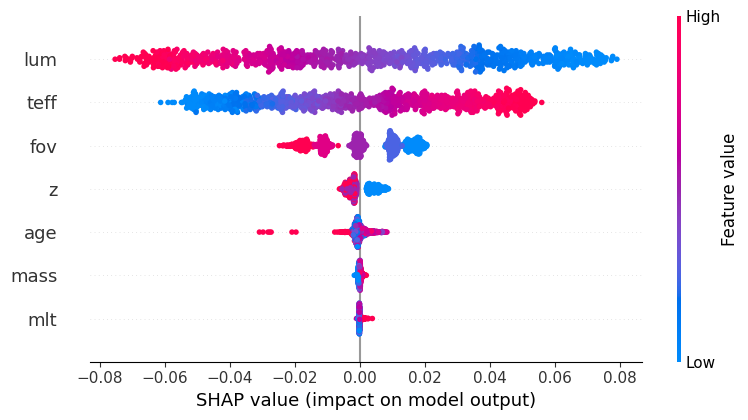

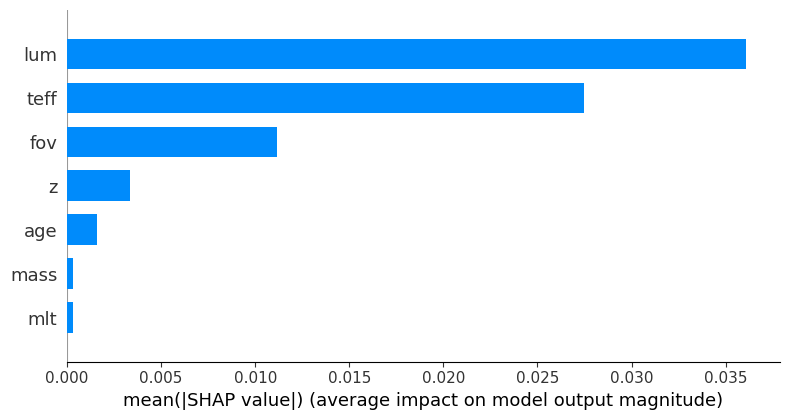

In [14]:
# 10% of the dataset
x_train_sample = x_train.sample(frac=0.1, random_state=42)

# Use KernelExplainer with flattened data
explainer = shap.Explainer(model.predict, x_train_sample[:1000]) 
shap_values = explainer(x_test[:1000])

# Plot SHAP summary and bar chart
shap.summary_plot(shap_values, x_test[:1000], feature_names=['mass', 'z', 'fov', 'mlt', 'age', 'teff', 'lum'])
shap.summary_plot(shap_values, x_test[:1000], feature_names=['mass', 'z', 'fov', 'mlt', 'age', 'teff', 'lum'], plot_type="bar")


In [11]:
### Pickling ###

import pickle

with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)


### Implement SHAP on a smaller scale

ExactExplainer explainer: 1871it [04:03,  7.32it/s]                             


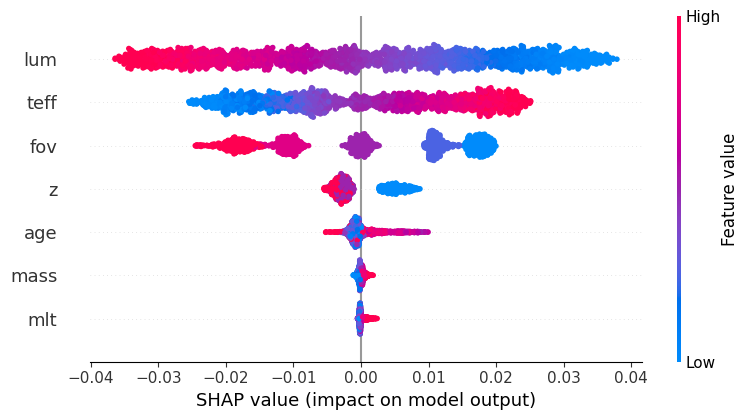

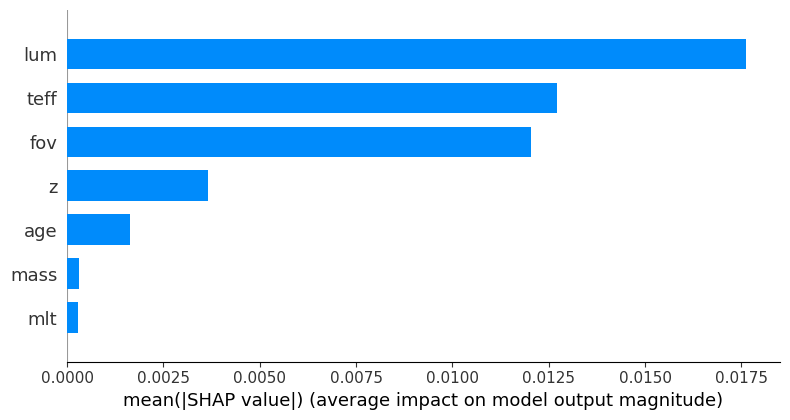

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

!pip install shap
import shap

# Load dataset
#data = pd.read_csv('spica_lum_teff_box_2sigma_age_ge_1e6.csv')
data = pd.read_csv('spica_lum_teff_box_age_ge_1e6.csv')

x = data[['mass', 'z', 'fov','mlt', 'age', 'teff', 'lum']]
y = data['log_k']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

#Build the model
#Random Forest
model = RandomForestRegressor(random_state=123)
model.fit(x_train, y_train)


# 10% of the dataset
x_train_sample = x_train.sample(frac=0.1, random_state=42)

# Use KernelExplainer with flattened data
explainer = shap.Explainer(model.predict, x_train_sample[:4000]) 
shap_values = explainer(x_test[:4000])

# Plot SHAP summary and bar chart
shap.summary_plot(shap_values, x_test[:4000], feature_names=['mass', 'z', 'fov', 'mlt', 'age', 'teff', 'lum'])
shap.summary_plot(shap_values, x_test[:4000], feature_names=['mass', 'z', 'fov', 'mlt', 'age', 'teff', 'lum'], plot_type="bar")